In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
df=pd.read_excel("/content/drive/MyDrive/freelancing/ehtisham work/Index prediction/data.xlsx")

In [51]:
df.head()

,Unnamed: 0,D/M/Y,H:M:S,CO,CH4,H2S,SPO2
0,0,2020-05-05,10:25:01,5.37,10496.41,15.45,98.0
1,1,2020-05-05,11:25:02,5.13,9721.47,5.73,98.0
2,2,2020-05-05,10:25:26,4.89,8707.83,5.17,98.0
3,3,2020-05-05,10:25:26,4.71,8045.35,4.67,98.0
4,4,2020-05-05,10:25:26,4.35,7040.90,4.25,98.0


In [52]:
df.isnull().sum()

Unnamed: 0        0
D/M/Y             0
H:M:S             0
CO                0
CH4               0
H2S           50640
SPO2          25233
dtype: int64

In [53]:
df.shape

(53566, 7)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53566 entries, 0 to 53565
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  53566 non-null  int64         
 1   D/M/Y       53566 non-null  datetime64[ns]
 2   H:M:S       53566 non-null  object        
 3   CO          53566 non-null  float64       
 4   CH4         53566 non-null  float64       
 5   H2S         2926 non-null   float64       
 6   SPO2        28333 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 2.9+ MB


In [55]:
df['D/M/Y'] = df['D/M/Y'].dt.strftime('%Y-%m-%d')

In [56]:
def check_type(data):
    if type(data) is str:
        return data
    else:
        return data.strftime("%H:%M:%S")

In [57]:
df['H:M:S'] = df['H:M:S'].apply(lambda x: check_type(x))

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53566 entries, 0 to 53565
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53566 non-null  int64  
 1   D/M/Y       53566 non-null  object 
 2   H:M:S       53566 non-null  object 
 3   CO          53566 non-null  float64
 4   CH4         53566 non-null  float64
 5   H2S         2926 non-null   float64
 6   SPO2        28333 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ MB


In [59]:
df.head()

,Unnamed: 0,D/M/Y,H:M:S,CO,CH4,H2S,SPO2
0,0,2020-05-05,10:25:01,5.37,10496.41,15.45,98.0
1,1,2020-05-05,11:25:02,5.13,9721.47,5.73,98.0
2,2,2020-05-05,10:25:26,4.89,8707.83,5.17,98.0
3,3,2020-05-05,10:25:26,4.71,8045.35,4.67,98.0
4,4,2020-05-05,10:25:26,4.35,7040.90,4.25,98.0


In [60]:
t=df.iloc[1,2]

In [61]:
type(t)

str

In [62]:
df['DateTime']=df['D/M/Y']+' '+df["H:M:S"]

In [63]:
df.head()

,Unnamed: 0,D/M/Y,H:M:S,CO,CH4,H2S,SPO2,DateTime
0,0,2020-05-05,10:25:01,5.37,10496.41,15.45,98.0,2020-05-05 10:25:01
1,1,2020-05-05,11:25:02,5.13,9721.47,5.73,98.0,2020-05-05 11:25:02
2,2,2020-05-05,10:25:26,4.89,8707.83,5.17,98.0,2020-05-05 10:25:26
3,3,2020-05-05,10:25:26,4.71,8045.35,4.67,98.0,2020-05-05 10:25:26
4,4,2020-05-05,10:25:26,4.35,7040.90,4.25,98.0,2020-05-05 10:25:26


In [64]:
df.columns

Index(['Unnamed: 0', 'D/M/Y', 'H:M:S', 'CO', 'CH4', 'H2S', 'SPO2', 'DateTime'], dtype='object')

In [65]:
df.drop(['Unnamed: 0', 'D/M/Y', 'H:M:S','CH4', 'CO', 'SPO2'],inplace=True,axis=1)

In [66]:
df

,H2S,DateTime
0,15.45,2020-05-05 10:25:01
1,5.73,2020-05-05 11:25:02
2,5.17,2020-05-05 10:25:26
3,4.67,2020-05-05 10:25:26
4,4.25,2020-05-05 10:25:26
...,...,...
53561,NaN,2020-05-05 18:9:58
53562,NaN,2020-05-05 18:9:59
53563,NaN,2020-05-05 18:09:06
53564,NaN,2020-05-05 18:09:07


In [67]:
df.isnull().sum()

H2S         50640
DateTime        0
dtype: int64

In [68]:
df['DateTime'] = pd.to_datetime(df['DateTime'],errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53566 entries, 0 to 53565
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   H2S       2926 non-null   float64       
 1   DateTime  53563 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 837.1 KB


In [70]:
df.head()

,H2S,DateTime
0,15.45,2020-05-05 10:25:01
1,5.73,2020-05-05 11:25:02
2,5.17,2020-05-05 10:25:26
3,4.67,2020-05-05 10:25:26
4,4.25,2020-05-05 10:25:26


In [71]:
df.isnull().sum()

H2S         50640
DateTime        3
dtype: int64

In [72]:
df.dropna(inplace=True)

In [73]:
df.isnull().sum()

H2S         0
DateTime    0
dtype: int64

In [74]:
df.shape

(2924, 2)

In [75]:
min(df['H2S'])

-2.2

In [76]:
max(df['H2S'])

15.45

In [77]:
np.std(df['H2S'])

0.6175089048829662

In [78]:
np.average(df['H2S'])

0.3893160054719563

In [79]:
df1=df

In [80]:
df=df1

In [81]:
df.head()

,H2S,DateTime
0,15.45,2020-05-05 10:25:01
1,5.73,2020-05-05 11:25:02
2,5.17,2020-05-05 10:25:26
3,4.67,2020-05-05 10:25:26
4,4.25,2020-05-05 10:25:26


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 53565
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   H2S       2924 non-null   float64       
 1   DateTime  2924 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 68.5 KB


In [83]:
df['H2S'][df['H2S']>10]=10
df['H2S'][df['H2S']<0]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
df.head()

,H2S,DateTime
0,10.00,2020-05-05 10:25:01
1,5.73,2020-05-05 11:25:02
2,5.17,2020-05-05 10:25:26
3,4.67,2020-05-05 10:25:26
4,4.25,2020-05-05 10:25:26


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2924 entries, 0 to 53565
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   H2S       2924 non-null   float64       
 1   DateTime  2924 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 68.5 KB


In [86]:
df = df.sort_values('DateTime')

In [87]:
df=df.set_index('DateTime')

In [88]:
df.head()

,H2S
DateTime,
2020-05-05 10:25:01,10.00
2020-05-05 10:25:26,1.51
2020-05-05 10:25:26,1.48
2020-05-05 10:25:26,1.45
2020-05-05 10:25:26,1.41


In [89]:
import math 
import numpy as np # Fundamental package for scientific computing with Python
import pandas as pd # For analysing and manipulating data
from datetime import date, timedelta # Date Functions
import matplotlib.pyplot as plt # For visualization
import matplotlib.dates as mdates # Formatting dates
from sklearn.metrics import mean_absolute_error, mean_squared_error # For measuring model performance / errors
from sklearn.preprocessing import MinMaxScaler #to normalize the price data 
from tensorflow.keras.models import Sequential # Deep learning library, used for neural networks
from tensorflow.keras.layers import LSTM, Dense # Deep learning classes for recurrent and regular densely-connected layers
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

# check the tensorflow version and the number of available GPUs
print('Tensorflow Version: ' + tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Tensorflow Version: 2.8.0
Num GPUs: 1


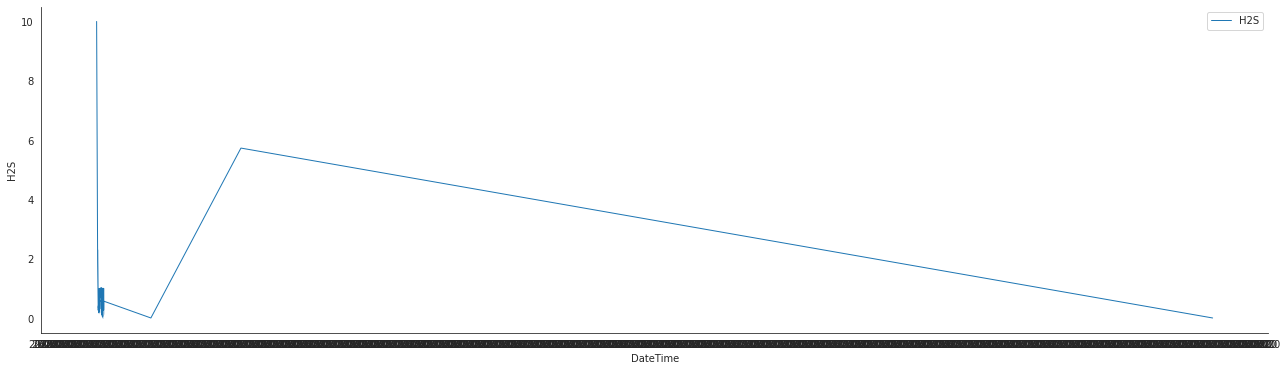

In [91]:
# Creating a Lineplot
years = mdates.MinuteLocator() 
fig, ax1 = plt.subplots(figsize=(22, 6))
ax1.xaxis.set_major_locator(years)
ax1.legend(['H2S'], fontsize=12)
sns.lineplot(data=df['H2S'], label='H2S', linewidth=1.0)
plt.ylabel('H2S')
plt.show()

In [92]:
# Feature Selection - Only CO Data
train_df = df.filter(['H2S'])
train_df.head()

,H2S
DateTime,
2020-05-05 10:25:01,10.00
2020-05-05 10:25:26,1.51
2020-05-05 10:25:26,1.48
2020-05-05 10:25:26,1.45
2020-05-05 10:25:26,1.41


In [93]:
# Feature Selection - Only Close Data
train_df = df.filter(['H2S'])
data_unscaled = train_df.values

# Get the number of rows to train the model on 80% of the data 
train_data_length = math.ceil(len(data_unscaled) * 0.8)

# Transform features by scaling each feature to a range between 0 and 1
mmscaler = MinMaxScaler(feature_range=(0, 1))
np_data = mmscaler.fit_transform(data_unscaled)

In [94]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 300

# Prediction Index
index_Close = train_df.columns.get_loc("H2S")
print(index_Close)
# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data.shape[0] * 0.8)

# Create the training and test data
train_data = np_data[0:train_data_len, :]
test_data = np_data[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, train_df):
    x, y = [], []
    data_len = train_df.shape[0]
    for i in range(sequence_length, data_len):
        x.append(train_df[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(train_df[i, index_Close]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_test[1][sequence_length-1][index_Close])
print(y_test[0])

0
(2040, 300, 1) (2040,)
(584, 300, 1) (584,)
0.1
0.1


In [95]:
# Configure the neural network model
model = Sequential()

neurons = sequence_length

# Model with sequence_length Neurons 
# inputshape = sequence_length Timestamps
model.add(LSTM(neurons, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(LSTM(neurons, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [96]:
# Training the model
model.fit(x_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
128/128 [==============================] - 7s 31ms/step - loss: 2.6411e-04
Epoch 2/20
128/128 [==============================] - 4s 31ms/step - loss: 1.2778e-04
Epoch 3/20
128/128 [==============================] - 5s 36ms/step - loss: 1.3934e-04
Epoch 4/20
128/128 [==============================] - 4s 31ms/step - loss: 1.2681e-04
Epoch 5/20
128/128 [==============================] - 4s 31ms/step - loss: 1.0993e-04
Epoch 6/20
128/128 [==============================] - 4s 31ms/step - loss: 1.0287e-04
Epoch 7/20
128/128 [==============================] - 4s 31ms/step - loss: 9.9348e-05
Epoch 8/20
128/128 [==============================] - 4s 32ms/step - loss: 1.0158e-04
Epoch 9/20
128/128 [==============================] - 4s 32ms/step - loss: 1.0541e-04
Epoch 10/20
128/128 [==============================] - 4s 32ms/step - loss: 1.0060e-04
Epoch 11/20
128/128 [==============================] - 4s 32ms/step - loss: 1.0909e-04
Epoch 12/20
128/128 [==============================]

In [97]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)
y_pred = mmscaler.inverse_transform(y_pred_scaled)
y_test_unscaled = mmscaler.inverse_transform(y_test.reshape(-1, 1))

In [98]:
y_pred_scaled

array([[0.09275532],
       [0.09275532],
       [0.09275532],
       [0.09275532],
       [0.09275532],
       [0.09275532],
       [0.09275532],
       [0.09275532],
       [0.09275532],
       [0.09275532],
       [0.09275532],
       [0.09275532],
       [0.04062288],
       [0.07368691],
       [0.08613548],
       [0.09105455],
       [0.09270879],
       [0.0931102 ],
       [0.03248019],
       [0.01657144],
       [0.01331796],
       [0.01627679],
       [0.06559827],
       [0.03933198],
       [0.03194916],
       [0.07203703],
       [0.08667865],
       [0.09167477],
       [0.04587979],
       [0.07589041],
       [0.02718022],
       [0.06869996],
       [0.08452072],
       [0.09040617],
       [0.0317851 ],
       [0.01562628],
       [0.01793664],
       [0.01105391],
       [0.06193609],
       [0.08336836],
       [0.09099266],
       [0.09311   ],
       [0.09327716],
       [0.09290157],
       [0.09249884],
       [0.09221798],
       [0.04068719],
       [0.027

In [99]:
y_pred

array([[0.9275532 ],
       [0.9275532 ],
       [0.9275532 ],
       [0.9275532 ],
       [0.9275532 ],
       [0.9275532 ],
       [0.9275532 ],
       [0.9275532 ],
       [0.9275532 ],
       [0.9275532 ],
       [0.9275532 ],
       [0.9275532 ],
       [0.40622878],
       [0.7368691 ],
       [0.86135477],
       [0.9105455 ],
       [0.9270879 ],
       [0.93110204],
       [0.32480192],
       [0.16571444],
       [0.13317959],
       [0.16276789],
       [0.65598273],
       [0.3933198 ],
       [0.31949162],
       [0.7203703 ],
       [0.8667865 ],
       [0.91674775],
       [0.45879793],
       [0.75890416],
       [0.27180225],
       [0.6869996 ],
       [0.8452072 ],
       [0.90406173],
       [0.31785098],
       [0.15626281],
       [0.17936644],
       [0.11053908],
       [0.61936086],
       [0.8336836 ],
       [0.9099266 ],
       [0.93109995],
       [0.93277156],
       [0.92901564],
       [0.9249884 ],
       [0.9221798 ],
       [0.40687189],
       [0.276

In [100]:
y_test_unscaled

array([[1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.14],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.04],
       [0.1 ],
       [0.19],
       [1.  ],
       [0.25],
       [0.29],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.22],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.22],
       [0.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.15],
       [0.25],
       [0.24],
       [0.19],
       [0.18],
       [0.  ],
       [0.2 ],
       [0.08],
       [0.22],
       [0.03],
       [0.09],
       [0.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.

In [101]:
# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 0.19
Mean Absolute Percentage Error (MAPE): inf %
Median Absolute Percentage Error (MDAPE): 13.31 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


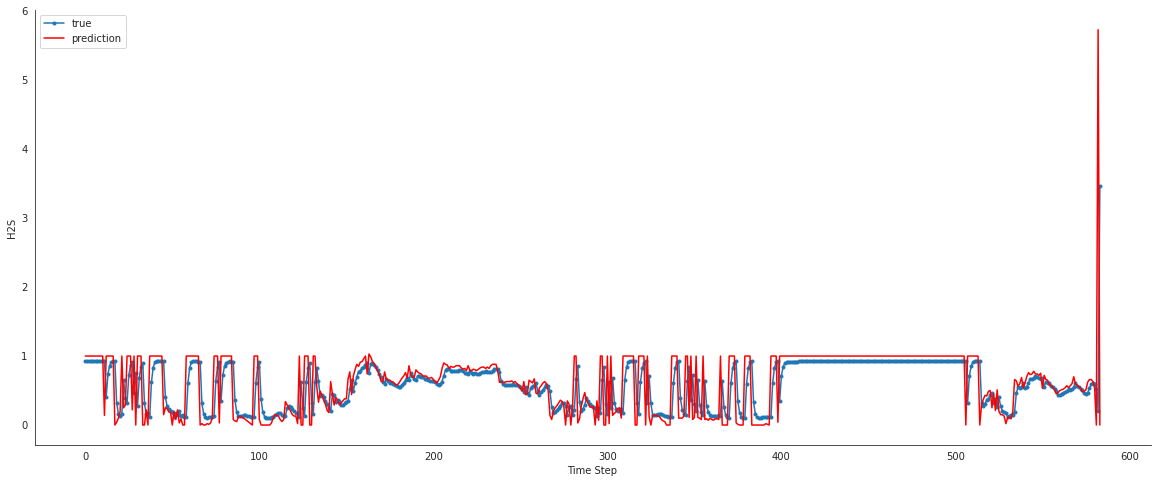

In [102]:
plt.figure(figsize=(20,8))
plt.plot(y_pred.flatten(), marker='.', label="true")
plt.plot(y_test_unscaled.flatten(), 'r', label="prediction")
plt.ylabel('H2S')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [103]:
sum(y_pred)

array([340.9826], dtype=float32)

In [104]:
sum(y_test_unscaled)

array([360.05])

In [105]:
# Get fresh data
df_new = df.filter(['H2S'])

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_days_scaled = mmscaler.transform(df_new[-sequence_length:].values)

# Create an empty list and Append past n days
X_test = []
X_test.append(last_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price, undo the scaling and output the predictions
pred_price = model.predict(X_test)
pred_price_unscaled = mmscaler.inverse_transform(pred_price)

# Print last price and predicted price for the next day
price_today = round(df_new['H2S'][-1], 2)
predicted_price = round(pred_price_unscaled.ravel()[0], 2)
percent = round(100 - (predicted_price * 100)/price_today, 2)

prefix = '+' if percent > 0 else ''
print(f'The close value for {"H2S"} at  was {price_today}')
print(f'The predicted close value is {predicted_price} ({prefix}{percent}%)')

The close value for H2S at  was 0.0
The predicted close value is 1.2699999809265137 (-inf%)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


In [106]:
model.save('/content/drive/MyDrive/freelancing/ehtisham work/Index prediction/models/H2S_lstm1.h5')

In [107]:
import pickle
output = open('/content/drive/MyDrive/freelancing/ehtisham work/Index prediction/encoders/H2S_encoder1.pkl', 'wb')
pickle.dump(mmscaler, output)
output.close()